## 1. 爬取上海市政府工作报告

In [1]:
import requests
from bs4 import BeautifulSoup
from urllib import request
import re

In [2]:
def get(url):
    headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/130.0.0.0 Safari/537.36'}
    req = request.Request(url, headers=headers)
    res = request.urlopen(req)
    html = res.read().decode('utf-8')
    return html

# 目标网页URL
url = 'https://www.shanghai.gov.cn/nw12336/index.html'

# 发送HTTP请求获取网页内容
response = get(url)

#print(response)
# 使用BeautifulSoup解析网页内容
soup = BeautifulSoup(response, 'html.parser')

# 找到所有的<a>标签，即链接
links = soup.find_all('a')
# 初始化一个空列表来存储包含“政府工作报告”的链接和标题
gov_reports_and_title = []
gov_reports_urls = []
# 遍历所有链接并提取包含“政府工作报告”的链接
for link in links:
    href = link.get('href')  # 获取href属性
    title = link.get('title', '')  # 获取title属性，如果不存在则返回空字符串
    if href and '政府工作报告' in title:  # 确保href属性存在，并且title包含“政府工作报告”
        # 构造完整的URL
        full_url = requests.compat.urljoin(url, href)
        gov_reports_urls.append(full_url)
        gov_reports_and_title.append((full_url, title))  # 将完整的URL和标题添加 

# 打印提取的链接和对应的标题
for url, title in gov_reports_and_title:
    print(f'Title: {title}\nURL: {url}\n')

Title: 龚正市长在上海市第十六届人民代表大会第二次会议的政府工作报告（2024年）
URL: https://www.shanghai.gov.cn/nw12336/20240129/2dfb672cc8b840f1b97788f74fb403cd.html

Title: 龚正市长在上海市第十六届人民代表大会第一次会议的政府工作报告（2023年）
URL: https://www.shanghai.gov.cn/nw12336/20230117/b511b08dd4e54a13bc592fed41ce2510.html

Title: 龚正市长在上海市第十五届人民代表大会第六次会议的政府工作报告（2022年）
URL: https://www.shanghai.gov.cn/nw12336/20220125/c1905a92364e418f96bb785c5ce97f5e.html

Title: 龚正市长在上海市第十五届人民代表大会第五次会议的政府工作报告（2021年）
URL: https://www.shanghai.gov.cn/nw12336/20210201/ca9e963912cc4c30be7b63799374cd86.html

Title: 应勇市长在上海市第十五届人民代表大会第三次会议的政府工作报告（2020年）
URL: https://www.shanghai.gov.cn/nw12336/20200813/0001-12336_1423630.html

Title: 应勇市长在上海市第十五届人民代表大会第二次会议的政府工作报告（2019年）
URL: https://www.shanghai.gov.cn/nw12336/20200813/0001-12336_1362001.html

Title: 应勇市长在上海市第十五届人民代表大会第一次会议的政府工作报告（2018年）
URL: https://www.shanghai.gov.cn/nw12336/20200813/0001-12336_1286704.html

Title: 杨雄市长在上海市第十四届人民代表大会第五次会议的政府工作报告（2017年）
URL: https://www.shanghai.gov.cn/nw12336/20200813/0001-1233

In [8]:
import os

### 获取历年政府工作报告的标题和内容
for full_url, title in gov_reports_and_title:
    html = get(full_url)  # 获取单个报告的网页内容
    soup = BeautifulSoup(html, 'html.parser')  # 解析HTML

    # 提取标题
    title = soup.title.string

    # 假设正文内容在<h1>标题下的<p>标签或<br>标签中，这个需要根据实际网页结构调整
    content_pattern = re.compile(r'<title[^>]*>(.*?)</title>(.*?)</body>', re.S)
    content_match = content_pattern.search(str(soup))

    if content_match:
        content = soup.body.get_text(separator='\n', strip=True)
        pattern_before = re.compile(r'^(.*?各位代表：)', re.S)
        cleaned_content = re.sub(pattern_before, '各位代表：\n', content, re.S)
    
        # 正则表达式匹配“分享：”之后的内容，并替换为空字符串（即删除这部分内容）
        pattern_share = re.compile(r'分享：.*$', re.S)
        cleaned_content = re.sub(pattern_share, '', cleaned_content, re.S)

        # 创建目录
        if not os.path.exists('data/上海市'):
            os.makedirs('data/上海市')

        # Sanitize the filename
        sanitized_title = re.sub(r'[\\/*?:"<>|\r\n]', "", title)

        # 写入txt文件保存
        with open(f'data/上海市/上海市{sanitized_title}.txt', 'w', encoding='utf-8') as f:
            f.write(cleaned_content)
        print(f'Saved: {sanitized_title}')
    else:
        print(f'No content found for: {title}')

Saved: 龚正市长在上海市第十六届人民代表大会第二次会议的政府工作报告（2024年）
Saved: 龚正市长在上海市第十六届人民代表大会第一次会议的政府工作报告（2023年）
Saved: 龚正市长在上海市第十五届人民代表大会第六次会议的政府工作报告（2022年）
Saved: 龚正市长在上海市第十五届人民代表大会第五次会议的政府工作报告（2021年）
Saved: 应勇市长在上海市第十五届人民代表大会第三次会议的政府工作报告（2020年）
Saved: 应勇市长在上海市第十五届人民代表大会第二次会议的政府工作报告（2019年）
Saved: 应勇市长在上海市第十五届人民代表大会第一次会议的政府工作报告（2018年）
Saved: 杨雄市长在上海市第十四届人民代表大会第五次会议的政府工作报告（2017年）
Saved: 杨雄市长在上海市第十四届人民代表大会第四次会议的政府工作报告（2016年）
Saved: 杨雄市长在上海市第十四届人民代表大会第三次会议的政府工作报告（2015年）
Saved: 杨雄市长在上海市第十四届人民代表大会第二次会议上的政府工作报告（2014年）
Saved: 杨雄市长在上海市第十四届人民代表大会第一次会议上的政府工作报告（2013年）
Saved: 韩正市长在上海市第十三届人民代表大会第五次会议上的政府工作报告（2012年）
Saved: 韩正市长在上海市第十三届人民代表大会第四次会议上的政府工作报告（2011年）
Saved: 韩正市长在上海市第十三届人民代表大会第三次会议上的政府工作报告(2010年)
Saved: 韩正市长在上海市第十三届人民代表大会第二次会议上的政府工作报告(2009年)
Saved: 韩正市长在上海市第十三届人民代表大会第一次会议上的政府工作报告(2008年)
Saved: 韩正市长在上海市第十二届人民代表大会第五次会议上的政府工作报告（2007年）
Saved: 韩正市长在上海市第十二届人民代表大会第四次会议上的政府工作报告（2006年）
Saved: 韩正市长在上海市第十二届人民代表大会第三次会议上的政府工作报告（2005年）


In [12]:
import jieba.posseg as pseg
import pandas as pd
import os
import re

# 定义停用词加载函数
def load_stopwords(path):
    with open(path, 'r', encoding='utf-8') as f:
        stopwords = f.read().split('\n')
    return set(stopwords)

# 分词并过滤停用词
def tokenize(text, stopwords):
    words = pseg.lcut(text)
    filtered_words = [word.word for word in words if word.word not in stopwords and len(word.word) > 1]
    return filtered_words

# 读取文件夹中的所有文件
def read_files(directory, stopwords):
    df = pd.DataFrame(columns=['year', 'tokens'])
    for filename in os.listdir(directory):
        if filename.endswith(".txt") and "政府工作报告" in filename:
            # 使用正则表达式提取年份
            year_match = re.search(r'（(\d{4})年）', filename)
            if year_match:
                year = year_match.group(1)
                with open(os.path.join(directory, filename), 'r', encoding='utf-8') as f:
                    text = f.read()
                    ctext = ''.join(re.findall(r'[\u4e00-\u9fff]+', text))
                    words = tokenize(ctext, stopwords)
                    df.loc[len(df)] = {'year': year, 'tokens': ' '.join(words)}
    return df

# 指定停用词表路径和文件夹路径
stopwords_path = 'cn_stopwords.txt'
directory = 'data/上海市'  # 假设脚本和文件在同一目录

# 加载停用词表
stopwords = load_stopwords(stopwords_path)

# 读取文件并创建DataFrame
df = read_files(directory, stopwords).sort_values('year')

# 展示DataFrame
df

,year,tokens
10,2005,首页 政务 公开 市政府 信息 公开 目录 市政府 提交 市人大 常委会 审议 各类 报告 ...
12,2006,代表 上海市 国民经济 社会 发展 第十一个五年 规划 上海 全面 贯彻落实 科学 发展观 ...
11,2007,代表 现在 代表 上海市人民政府 大会 政府 工作 报告 请予 审议 政协委员 列席 人员 ...
9,2011,代表 现在 代表 上海市人民政府 大会 政府 工作 报告 请予 审议 政协委员 列席 人员 ...
8,2012,代表 现在 代表 上海市人民政府 大会 政府 工作 报告 请予 审议 政协委员 列席 人员 ...
3,2013,代表 现在 代表 上海市人民政府 大会 报告 本届 政府 过去 五年 工作 今后 五年 工作...
5,2014,代表 现在 代表 上海市人民政府 大会 政府 工作 报告 请予 审议 政协委员 列席 人员 ...
4,2015,代表 现在 代表 上海市人民政府 大会 报告 政府 工作 请予 审议 政协委员 列席 人员 ...
7,2016,代表 现在 代表 上海市人民政府 大会 报告 政府 工作 请予 审议 政协委员 列席 人员 ...
6,2017,代表 现在 代表 上海市人民政府 大会 报告 政府 工作 请予 审议 政协委员 列席 人员 ...


In [10]:
data = []
# 遍历defaultdict并转换为字典
for i in range(len(df['year'])):
    row = {
        'year': df['year'][i],
        'tokens': df['tokens'][i]
    }
    data.append(row)

# 将列表转换为pandas.DataFrame
df = pd.DataFrame(data)
print(type(df))
print(df)

<class 'pandas.core.frame.DataFrame'>
    year                                             tokens
0   2012  代表 现在 代表 上海市人民政府 大会 政府 工作 报告 请予 审议 政协委员 列席 人员 ...
1   2014  代表 现在 代表 上海市人民政府 大会 政府 工作 报告 请予 审议 政协委员 列席 人员 ...
2   2021  代表 现在 代表 上海市人民政府 大会 报告 工作 请予 审议 政协委员 列席 人员 提出 ...
3   2007  代表 现在 代表 上海市人民政府 大会 政府 工作 报告 请予 审议 政协委员 列席 人员 ...
4   2022  代表 现在 代表 上海市人民政府 大会 报告 工作 请予 审议 政协委员 列席 人员 提出 ...
5   2005  首页 政务 公开 市政府 信息 公开 目录 市政府 提交 市人大 常委会 审议 各类 报告 ...
6   2024  代表 现在 代表 上海市人民政府 大会 报告 工作 请予 审议 政协委员 列席 人员 提出 ...
7   2013  代表 现在 代表 上海市人民政府 大会 报告 本届 政府 过去 五年 工作 今后 五年 工作...
8   2018  代表 现在 代表 上海市人民政府 大会 报告 工作 请予 审议 政协委员 列席 人员 提出 ...
9   2016  代表 现在 代表 上海市人民政府 大会 报告 政府 工作 请予 审议 政协委员 列席 人员 ...
10  2015  代表 现在 代表 上海市人民政府 大会 报告 政府 工作 请予 审议 政协委员 列席 人员 ...
11  2023  代表 现在 代表 上海市人民政府 大会 报告 工作 请予 审议 政协委员 列席 人员 提出 ...
12  2019  代表 现在 代表 上海市人民政府 大会 报告 工作 请予 审议 政协委员 列席 人员 提出 ...
13  2006  代表 上海市 国民经济 社会 发展 第十一个五年 规划 上海 全面 贯彻落实 科学 发展观 ...
14  2020  代表 现在 代表 上海市人民政府 大会 报告 工作 请予 审议 政协委员 列席 人员 提出 ...
15

In [13]:
digital_words = '数字经济、数据安全、智慧化、智能经济、数据服务、信息经济、互联网、云平台、智能制造、物联网、数字化、数字产业、信息技术、区块链、数字基础设施、大数据、数据治理、云计算、数字生活、智能化、人工智能、数据共享、机器人、工业互联网、数字技术'.split('、')
green_words = '生态、污染、生态环境、节能、新能源、绿化、环境保护、环保、绿色、可持续发展、排放、环境治理'.split('、')

In [15]:
import numpy as np

df_new = pd.DataFrame(columns=['year', 'green', 'digital'])
for i in df.index:
    words = df.loc[i, 'tokens'].split(' ')
    year = df.loc[i, 'year']
    green_score = 0
    for word in words:
        if word in green_words:
            green_score += 1
    digital_score = 0
    for word in words:
        if word in digital_words:
            digital_score += 1
    df_new.loc[df_new.shape[0] + 1] = {'year': year,
                                       'green': np.log(green_score / len(words) + 1), # 计算绿色环保关注度
                                       'digital': np.log(digital_score / len(words) + 1)} # 计算数字化关注度
df_new.to_csv('data/上海市政府关注度.csv', index=False)
df_new

,year,green,digital
1,2005,0.003661,0.000167
2,2006,0.005002,0.001002
3,2007,0.004874,0.000132
4,2011,0.004679,0.000852
5,2012,0.002855,0.001143
6,2013,0.003526,0.000504
7,2014,0.007128,0.000580
8,2015,0.005349,0.000893
9,2016,0.005926,0.001485
10,2017,0.005916,0.001186


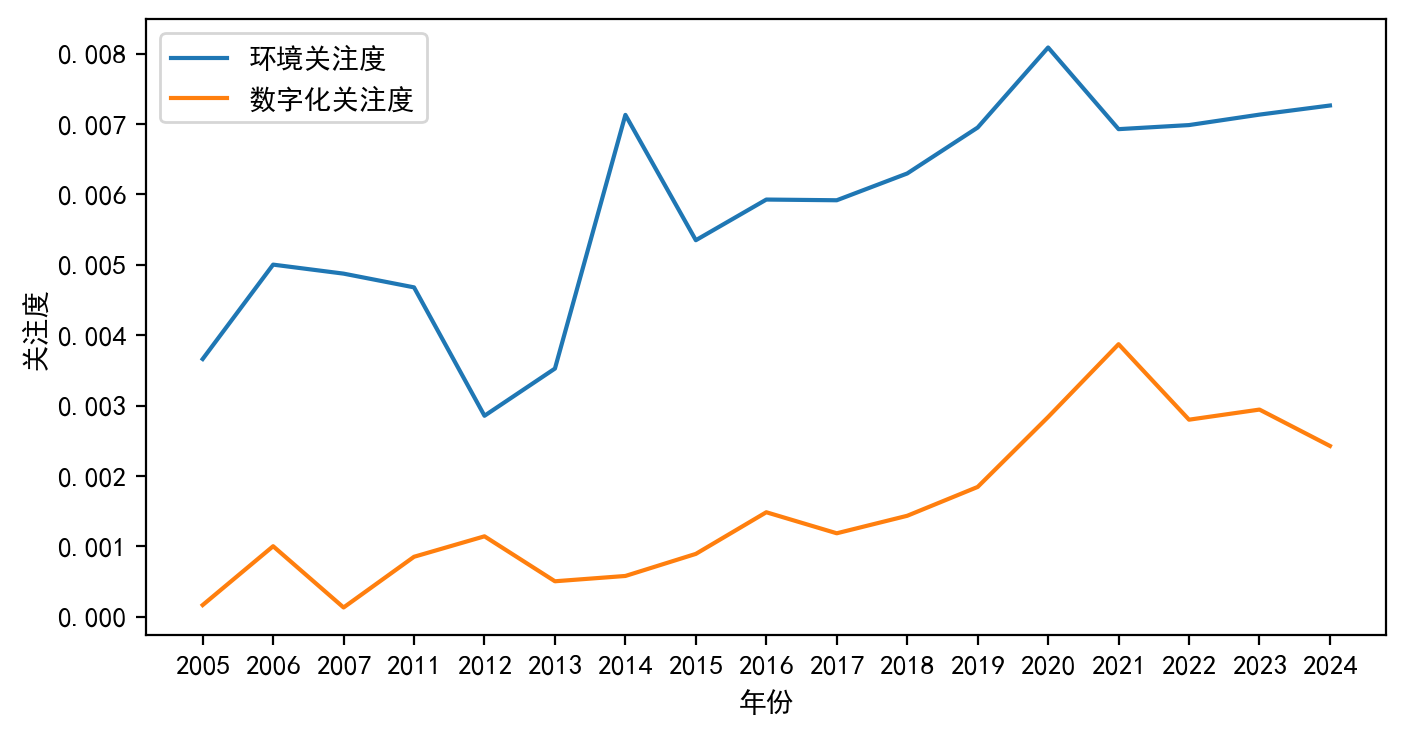

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

### 可视化
plt.figure(figsize=(8, 4), dpi=200)

sns.lineplot(data=df_new, x='year', y='green', label='环境关注度')
sns.lineplot(data=df_new, x='year', y='digital', label='数字化关注度')

plt.legend()
plt.ylabel('关注度')
plt.xlabel('年份')

plt.xticks(df_new['year'])

plt.rcParams['font.sans-serif'] = 'SimHei'
plt.rcParams['axes.unicode_minus'] = False
plt.show()